# Collatz 
- Code By Michael Sherif Naguib
- license: MIT open source
- Date: 7/17/19
- @University of Tulsa
- Description: An Exploration of the Collatz Conjecture

In [1]:
%matplotlib notebook
#imports
from NumLib import PlotUtil # see https://github.com/Michael-Naguib/NumLib       (side note: this has A LOT of big imports... be patient)
import numpy as np
import random
import math
import sys
import bisect
import tqdm
import multiprocessing as mp

### Collatz Value Cache:
- Stores the memoized values for memoized_collatz(n)
- **NOTE!** AS these values are saved between runs... if there is an error in the functions which place values in these... it may cause an improper value to be stored...
- **WARNING!** although these memoized versions have a benifit by not having to do as many computations if the path length is unique and exceeds python's max recursive depth they will error...

In [2]:
collatz_cache={}
collatz_sequences_cache={1:[1]}
collatz_sequence_length_cache={1:1,0:0}

### Collatz Functions:
- These are regular as well as memoized versions of functions that calculate: collatz of n, the sequence for n, as well as the sequence length for n

In [3]:
#Collatz function:
def collatz(n):
    r=n/2# more efficient than % edge case 0
    if r==n//2:
        return r
    else:
        return 3*n + 1

#Memoizes Collatz values computation:
def memoized_collatz(n):
    if n in collatz_cache:
        return collatz_cache[n]
    else:
        result = collatz(n)
        collatz_cache[n]=result
        return result

In [4]:
#The Collatz sequence progression from n --> 1 (inclusive of each): returns the sequence as a list
def collatz_sequence(n):
    all_nums = [n]   
    num = n
    while(num != 1):
        num = memoized_collatz(num)
        all_nums.append(int(num))
    return all_nums

#Memoizes Sequences .... sequence progression from n --> 1 (inclusive of each): returns the sequence as a list
def memoized_collatz_sequence(n):
    if n in collatz_sequences_cache:
        return collatz_sequences_cache[n]
    else:
        all_nums=[n]
        all_nums = all_nums + memoized_collatz_sequence(memoized_collatz(n))
        return all_nums
    
#Memoizes the sequence Length ... more memory efficient.... 
def memoized_collatz_sequence_length(n):
    if n in collatz_sequence_length_cache:
        return collatz_sequence_length_cache[n]
    else:
        result = 1+ memoized_collatz_sequence_length(memoized_collatz(n))
        collatz_sequence_length_cache[n] = result
        return result

### Generate a Plot of Path Length vs Number 

In [6]:
#Settings
NUM_OF_POINTS=100000#int(math.pow(10,5))
#Create the x axis values
x = np.array(list(range(NUM_OF_POINTS)))
#What this does: maps a range same as the x axis to its path length then converts to a numpy array... tqdm logs progress...
y = np.array(list(map(lambda x : memoized_collatz_sequence_length(x),tqdm.tqdm(range(NUM_OF_POINTS)))))

100%|██████████████████████████████| 100000/100000 [00:00<00:00, 206504.88it/s]


<IPython.core.display.Javascript object>


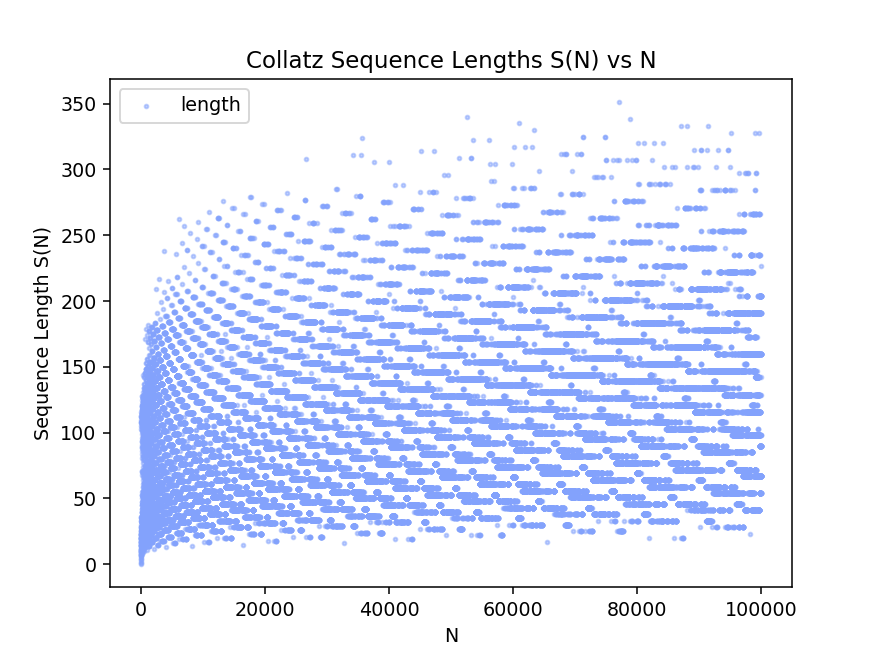

In [7]:
#Plot the Results
#pu = PlotUtil.PlotUtil([x,y])
#pu.interactive_plot()
PlotUtil.PlotUtil.plot({'data':[x,y],"name":"length"},x_name="N", y_name="Sequence Length S(N)",title="Collatz Sequence Lengths S(N) vs N")

### Expiramentation
- I was curious as to what the collatz length for fibonacci numbers looked like graphically... 

In [12]:
#Settings
NUM_OF_POINTS=1000#int(math.pow(10,5))

#The Golden Ratio
phi = (1+math.sqrt(5))/2
#A Quick and easy way to calculate the Nth Fibonacci Number (binet's formula)
fib_n = lambda n: math.floor((math.pow(phi,n)-1/math.pow(0-phi,n))/math.sqrt(5))

#Define the Expirament Function: this will be passed the Input Domain
def expirament(n):
    return memoized_collatz_sequence_length(n)/(n if n!=0 else 1)

#Create the x axis values
x_2 = np.array(list(range(NUM_OF_POINTS)))

#Map The Input Domain (recreated as a range) to te Output 
y_2 = np.array(list(map(expirament,tqdm.tqdm(range(NUM_OF_POINTS)))))


100%|██████████████████████████████████| 1000/1000 [00:00<00:00, 499857.47it/s]


<IPython.core.display.Javascript object>


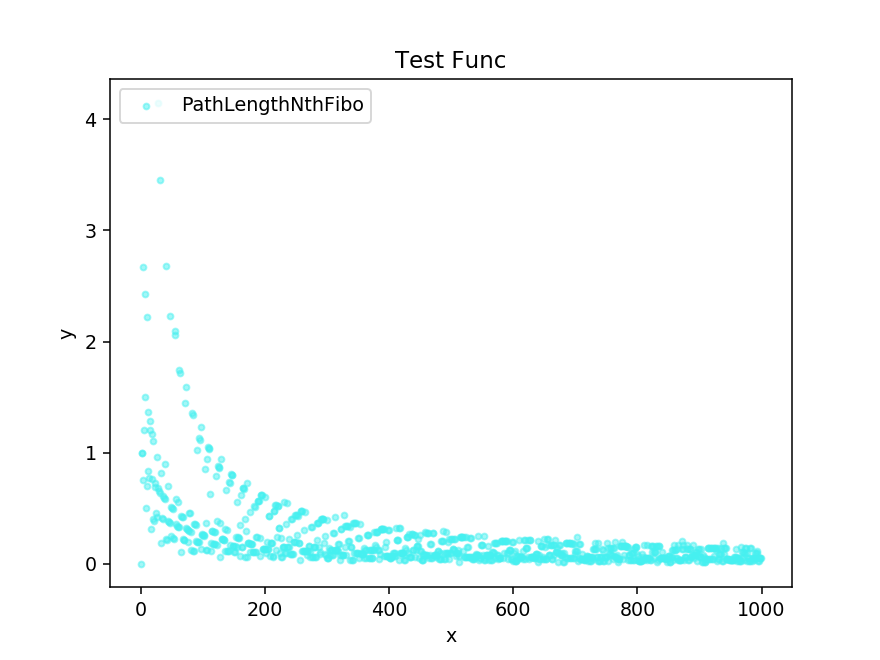

In [13]:
#Plot the Data
#PlotUtil.PlotUtil.plot({'data':[x_2,y_2],"name":"length"})
#PlotUtil.PlotUtil.plotSeries([{"name":"PathLengthNthFibo","x":x_2,"y":y_2},{"name":"collatz","x":x_3,"y":y_3}],title="Test Func")
PlotUtil.PlotUtil.plotSeries([{"name":"PathLengthNthFibo","x":x_2,"y":y_2}],title="Test Func")

### Collatz Tree (Revision)
> WARNING: this not even meant to be accedemic nor rigorous ... it might not even make sense at some points ... it is a quick jot down of a question I had ... rather a series of questions that i am trying to formulate... in essence this is my rough rough draft or even just intuition...

- I decided to interpret collatz sequences as belonging to a tree; The code below is a efficient way of building a tree. 
- Memoized Collatz functions will calculate the new subtrees to add to the main tree
- Note that n=log_k(d) where d is depth and n is number of nodes (the Split factor is k, ex. binary tree has k=2, quadtree k=4)
- What is the Average Split per each level of the tree? 
- What is the Average Split for the tree overall? 
- What is the Distribution (across the different levels) for the Splits
- How *complete* is the Tree? Given a known max depth d, and known number of nodes n what is k? compare this to knowing the average split value for k in the tree and known number of nodes n what is the computed value for d? 
- How do different Tree Properties (or constants) change as more nodes are added onto the tree for sequential collatz sequence additions?
- Example... Consider the collatz length for any given number x ∈ [1,n] what is what is ave k? median k? ave d? medain d? etc...
- Consider path lengths as a sort of inverse weight: how does the tree grow when we filter based on path length --> the larger the path length the greater priority that number n has for having it's sequence merged into the tree. How would this tree structure compare?
- There is much potential for interpreting collatz sequences as tree structures

### Tree Node  Class
- This is a class for creating a tree structure

In [14]:
#VERY basic tree class....
class TreeNode():
    def __init__(self,value):
        self.value = value
        self.children = []
    #Adds a Child to the node
    def addChild(self,otherNode):
        self.children.append(otherNode)
    #Searches Depth first for a value in a tree and if it is not found returns None
    def searchDepth(self,value):
        if self.value == value:
            return self
        else:
            loc = None
            for c in self.children:
                loc = c.searchDepth(value)
                if loc != None:
                    break
            return loc   
    #tree value structure...
    def structure(self):
        s = str({self.value:[c.structure() for c in self.children]})
        return s
    def __str__(self):
        return str(self.structure())
    def __lt__(self,other):
        return self.value < other.value
    def __gt__(self,other):
        return self.value > other.value
    def __eq__(self,other):
        return self.value == other.value
    def __le__(self,other):
        return self.value <= other.value
    def __ge__(self,other):
        return self.value >= other.value
    def preOrderTraversal(self,func):
        #preforms a preorder traversal calling the func on the node at the apprpiate time
        func(self)
        for child in self.children:
            child.preOrderTraversal(func)

### Build Tree (Revision 3)
- Builds a collatz tree:
##### Approach
- Create a Root node with value 1 (the last number in the non trrivial iteration in the colatz sequence)
- Use a dictionary to store references to each node in the tree first initilizing the dictionary with one entry: Key = 1 Value= Root Reference
- The reason for using a dictionary is this will enable fast lookup of nodes in the collatz tree. More often than not Collatz Sequences return to 1 relativly quickly. Heuristically this means that many Sequences are the same after a certian point ... I will refer to this point as the 'collision point'; The collision point for numbers p and k  is the point at which the subsequences till 1 are the same. 
- So instead of traversing & searching the tree (which is constantly growing) to get to the desired node a dictionary is used to quickly find that node ...
- The calculation uses a memoized collatz function to first compute the sequence for a value n
- Iterating over that sequence we build a subtree backwards from all the sequence values not already in the dictionary. During this iteration sequence values that are not already in the dictionary are added with the reference to the node. 
- Because there is no branching we can build the subtree backwards as we go along...
- Once the iteration hits a value already in the tree we append the already constructed subtree as a child of that tree ... here the dictionary can be used to quickly look up the reference to that node ...
##### Approach TLDR:
- On a high level I am building the tree from partial sequences that are not already in the tree using a dictionary to keep track of references to nodes in the tree and to know when to stop building the subtree. 

In [18]:
def addNSequenceToTree(found,n):
    #Where found is the dictionary of nodes and n is the number to calculate the sequence for then update the tree
    #calculate the sequence for n: inclusive of start and stop ... n-->1 [n....1]
    s = memoized_collatz_sequence(n)
    #Edge error case: the user called this func redundanly ... n is already in the tree
    if n in found:
        return
    #otherwise build the subtree: init the first 
    prev = TreeNode(n)
    found[n] = prev
    #iterate forwards building the chain
    for i in range(1,len(s)):#exclude the first... (handled by the init)
        if s[i] not in found: 
            newNode = TreeNode(s[i])
            #print(newNode)
            found[s[i]] = newNode
            newNode.addChild(prev)
            #print(prev)
            prev = newNode#change ref
        else:
            found[s[i]].addChild(prev)#append the entire subtree to the tree by linking it in found
            return#exit ...       

### Hypothesis testing
- Now that there is a working tree building code  (addNSequenceToTree)  I will begin my analysis of the tree's structure

#### Determine the Average Split across the entire Tree: ave k
- Determine the average 'split' i.e binary tree two nodes for every unless leaf... 
- Graph how the Average Split: ave k changes as sequences for increasing values of n are added to the tree

100%|█████████████████████████████████████| 5000/5000 [00:21<00:00, 230.13it/s]


<IPython.core.display.Javascript object>


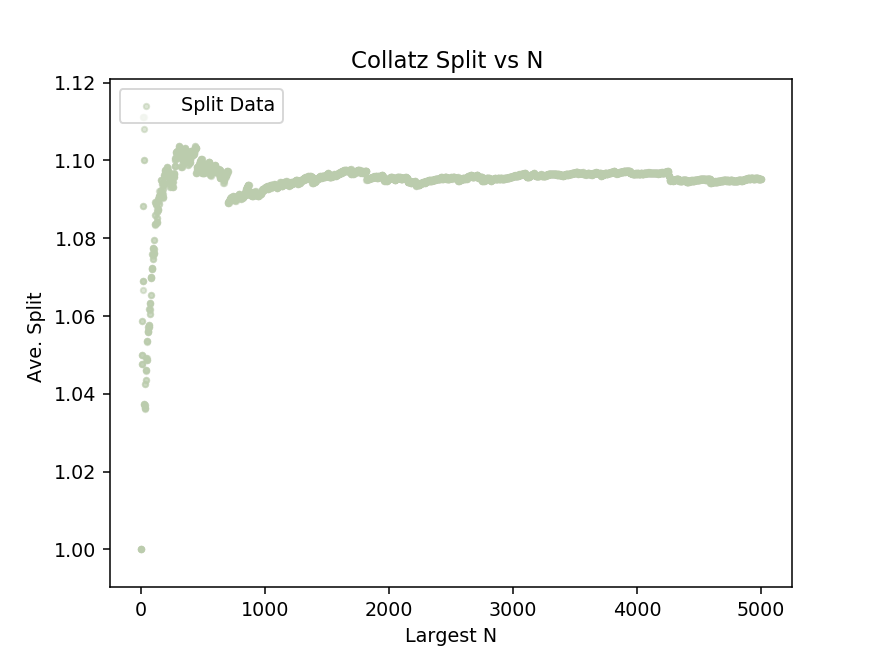

In [19]:
#Settings
MAX_N = 5000

#Function to calculate averaeg split for all nodes in the tree
def calc_ave_split(root_node):
    lengths = []
    root_node.preOrderTraversal(lambda n: lengths.append(len(n.children)) if len(n.children)!=0 else None)
    ave = sum(lengths)/len(lengths) if len(lengths)!=0 else None
    return ave

#Store the Point Data
x = []
y = []

#Init the calculation
root = TreeNode(1)
ref_cache = {root.value:root}# store Key: (value of tree item)  Value: Tree Node Reference

#Add sequences for increasing values of n are added to the tree
for n in tqdm.tqdm(range(1,MAX_N+1)):
    #Add the sequence for n to the tree 
    addNSequenceToTree(ref_cache,n)
    #Store the Input Domain number in a list
    x.append(n)
    #Calculate the Average Split: ave k 
    ave_k = calc_ave_split(root)
    #Add to the output data : handle edge cases (leaf nodes)
    y.append(ave_k if ave_k!=None else ave_k)
#Convert to Numpy Array
x = np.array(x)
y = np.array(y)

#Plot the Data
PlotUtil.PlotUtil.plot({'data':[x,y],"name":"Split Data"},x_name="Largest N", y_name="Ave. Split ",title="Collatz Split vs N ")